In [1]:
# from urllib.request import urlopen

# shakespeare = urlopen('http://composingprograms.com/shakespeare.txt')

# words= set(shakespeare.read().decode().split())

# w for w in words if len(w) == 6 and w[::-1] in words

In [2]:
max(7.5, 9.5)
pow(100, 2)
pow(2, 100)
max(1, -2, 3, -4)
max(min(1, -2), min(pow(3, 5), -4))

-2

In [3]:
from math import sqrt
sqrt(256)

16.0

In [4]:
from operator import add, sub, mul
add(14, 28)
sub(100, mul(7, add(8, 4)))

16

In [5]:
from math import pi
pi * 71 / 223

1.0002380197528042

In [6]:
f = max
f(1, 2, 3)

# max = 5
# max(5, 4)
# 运行即报错

3

In [7]:
x, y = 3, 4.5
y, x = x, y
print(x)
print(y)

4.5
3


In [8]:
# print不是纯函数，其返回值是None
print(print(1), print(2))

1
2
None None


In [9]:
def square(x):
    return mul(x, x)
square(21)
square(square(3))

81

函数定义通常包含描述函数的文档，称为文档字符串，它必须与函数体一起缩进。文档字符串通常是三重引用的。第一行在一行中描述了该函数的工作。以下几行可以描述参数并阐明函数的行为：

In [10]:
def pressure(v, t, n):
        """Compute the pressure in pascals of an ideal gas.

        Applies the ideal gas law: http://en.wikipedia.org/wiki/Ideal_gas_law

        v -- volume of gas, in cubic meters
        t -- absolute temperature in degrees kelvin
        n -- particles of gas
        """
        k = 1.38e-23  # Boltzmann's constant
        return n * k * t / v

help(pressure)

Help on function pressure in module __main__:

pressure(v, t, n)
    Compute the pressure in pascals of an ideal gas.
    
    Applies the ideal gas law: http://en.wikipedia.org/wiki/Ideal_gas_law
    
    v -- volume of gas, in cubic meters
    t -- absolute temperature in degrees kelvin
    n -- particles of gas



In [11]:
# 提供参数的默认值
def pressure(v, t, n=6.022e23):
        """Compute the pressure in pascals of an ideal gas.

        v -- volume of gas, in cubic meters
        t -- absolute temperature in degrees kelvin
        n -- particles of gas (default: one mole)
        """
        k = 1.38e-23  # Boltzmann's constant
        return n * k * t / v

In [12]:
0 == -0

True

In [13]:
def fib(n):
    """ 斐波那契 """
    pred, curr = 0, 1
    k = 2
    while k < n:
        pred, curr = curr, pred + curr
        k = k + 1
    return curr

result = fib(8)
result

13

In [14]:
# 测试语句，将测试语句单独封装放在_test.py中
def fib_test():
    assert fib(2) == 1, 'The 2nd fibonacci number should be 1'

Doctest

Python 提供了一种方便的方法，可以将简单的测试直接放置在函数的文档字符串中。文档字符串的第一行应包含函数的单行描述，后跟一个空行。随后可能会详细描述参数和行为。此外，文档字符串可能包括调用该函数的示例交互式会话：

In [15]:
def sum_naturals(n):
    """ 计算前n个自然数的和 
    >>> sum_naturals(10)
    55
    >>> sum_naturals(100)
    5050
    """
    total, k = 0, 1
    while k <= n:
        total, k = total + k, k + 1
    return total

help(sum_naturals)

from doctest import testmod
testmod()

Help on function sum_naturals in module __main__:

sum_naturals(n)
    计算前n个自然数的和 
    >>> sum_naturals(10)
    55
    >>> sum_naturals(100)
    5050



TestResults(failed=0, attempted=2)

To verify the doctest interactions for only a single function, we use a `doctest` function called `run_docstring_examples`. This function is (unfortunately) a bit complicated to call. Its first argument is the function to test. The second should always be the result of the expression `globals()`, a built-in function that returns the global environment. The third argument is True to indicate that we would like "verbose" output: a catalog of all tests run.

In [16]:
from doctest import run_docstring_examples
run_docstring_examples(sum_naturals, globals(), True)

Finding tests in NoName
Trying:
    sum_naturals(10)
Expecting:
    55
ok
Trying:
    sum_naturals(100)
Expecting:
    5050
ok


In [17]:
# 高阶函数, 函数作为参数
def summation(n, term):
    total, k = 0, 1
    while k <= n:
        total, k = total + term(k), k + 1
    return total

def cube(x):
    return x*x*x

def sum_cubes(n):
    return summation(n, cube)

def identity(x):
    return x

def sum_naturals(n):
    return summation(n, identity)

result = sum_cubes(3)
result

36

In [18]:
def pi_term(x):
    return 8 / ((4 * x - 3) * (4 * x - 1))

def pi_sum(n):
    return summation(n, pi_term)

# pi的近似
pi_sum(1e6)

3.141592153589902

递归扩展来获得黄金比的连分数

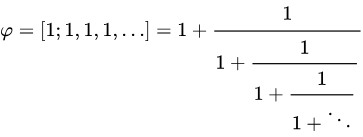

In [19]:
# 黄金分割
def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

def golden_update(guess):
    return 1 / guess + 1

def square_close_to_successor(guess):
    return approx_eq(guess * guess, guess + 1)

def approx_eq(x, y, tolerance=1e-15):
    return abs(x - y) < tolerance

improve(golden_update, square_close_to_successor)

# 精确闭式解
from math import sqrt
phi = 1 / 2 + sqrt(5) / 2
def improve_test():
    approx_phi = improve(golden_update, square_close_to_successor)
    assert approx_eq(phi, approx_phi), 'phi differs from its approximation'

improve_test()

In [20]:
# 嵌套定义
def average(x, y):
    return (x + y) / 2

def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

def approx_eq(x, y, tolerance=1e-3):
    return abs(x - y) < tolerance

def sqrt_appro(a):
    def sqrt_update(x):
        return average(x, a/x)
    def sqrt_close(x):
        return approx_eq(x * x, a)
    return improve(sqrt_update, sqrt_close)
sqrt_appro(256)

16.00000352670594

In [21]:
# return值为函数
def compose1(f, g):
    def h(x):
        return f(g(x))
    return h

def square(x):
    return x * x

def successor(x):
    return x + 1

square_successor = compose1(square, successor)
result = square_successor(12)
result

169

In [22]:
def improve(update, close, guess=1):
    while not close(guess):
        guess = update(guess)
    return guess

def approx_eq(x, y, tolerance=1e-3):
    return abs(x - y) < tolerance

def newton_update(f, df):
    def update(x):
        return x - f(x) / df(x)
    return update

def find_zero(f, df):
    def near_zero(x):
        return approx_eq(f(x), 0)
    return improve(newton_update(f, df), near_zero)

def power(x, n):
    product, k = 1, 0
    while k < n:
        product, k = product * x, k + 1
    return product

def nth_root_of_a(n, a):
    def f(x):
        return power(x, n) - a
    def df(x):
        return n * power(x, n-1)
    return find_zero(f, df)

nth_root_of_a(3, 64)

4.000017449510739

In [23]:
def curried_pow(x):
    def h(y):
        return pow(x, y)
    return h

curried_pow(2)(3)

def map_to_range(start, end, f):
    while start < end:
        print(f(start))
        start = start + 1
map_to_range(0, 10, curried_pow(2))

1
2
4
8
16
32
64
128
256
512


In [24]:
def curry2(f):
    def g(x):
        def h(y):
            return f(x, y)
        return h
    return g

def uncurry(g):
    def f(x, y):
        return g(x)(y)
    return f

pow_curried = curry2(pow)
pow_curried(2)(5)   # = 32
map_to_range(0, 10, pow_curried(2))


1
2
4
8
16
32
64
128
256
512


In [25]:
uncurry(pow_curried)(2, 5)

32

In [26]:
s = lambda x: x * x
s(12)

144

In [27]:
def compose1(f, g):
    return lambda x: f(g(x))

f = compose1(lambda x : x * x, lambda y : y + 1)

f(12)

169

在Python中，`@` 符号被称为装饰器（Decorator），它提供了一种简洁的语法来修改或增强函数或类的行为。装饰器允许你在不修改原始函数定义的情况下，对函数的行为进行包装或修改。

在你的例子中，`@trace` 是一个装饰器，它被应用于函数 `triple` 上面。这意味着 `trace` 函数将会被调用，然后将函数 `triple` 作为参数传递给 `trace` 函数。`trace` 函数返回的结果（一个新的函数）将会替代原始的 `triple` 函数。

在这个例子中，`trace` 函数接受一个函数 `fn` 作为参数，然后返回一个新的函数 `wrapped`。在 `wrapped` 函数内部，它首先会打印一条带有 `fn` 和参数 `x` 的消息，然后调用原始函数 `fn`，并将参数 `x` 传递给它。最后，`wrapped` 函数返回原始函数的结果。

因此，当你调用 `triple(12)` 时，实际上会调用 `wrapped(12)`，而 `wrapped` 函数中会输出 `-> triple ( 12 )`，然后调用原始的 `triple` 函数，返回结果 `36`。

In [28]:
def trace(fn):
    def wrapped(x):
        print('->', fn, '(', x, ')')
        return fn(x)
    return wrapped

@trace
def triple(x):
    return 3 * x

triple(12)

-> <function triple at 0x0000020D6B3F7700> ( 12 )


36

In [29]:
# 递归
def sum_digits(n):
    """ 返回各位数字之和 """
    if n < 10:
        return n
    else:
        all_but_last, last = n // 10, n % 10
        return sum_digits(all_but_last) + last
sum_digits(11408855402054064613470328848384)

126

In [30]:
# 相互递归
def is_even(n):
    if n == 0:
        return True
    else:
        return is_odd(n-1)

def is_odd(n):
    if n == 0:
        return False
    else:
        return is_even(n-1)

is_even(4)

True

In [31]:
# 将互递归函数变成单个递归函数
def is_even(n):
    if n == 0:
        return True
    else:
        if (n-1) == 0:
            return False
        else:
            return is_even((n-1)-1)
is_even(8)

True

In [32]:
def cascade(n):
    print(n)
    if n >= 10:
        cascade(n // 10)
        print(n)

cascade(2013)

2013
201
20
2
20
201
2013


In [33]:
# 树回归
# 6 = 2 + 4
# 6 = 1 + 1 + 4
# 6 = 3 + 3
# 6 = 1 + 2 + 3
# 6 = 1 + 1 + 1 + 3
# 6 = 2 + 2 + 2
# 6 = 1 + 1 + 2 + 2
# 6 = 1 + 1 + 1 + 1 + 2
# 6 = 1 + 1 + 1 + 1 + 1 + 1
def count_partitions(n, m):
    if n == 0:
        return 1
    elif n < 0:
        return 0
    elif m == 0:
        return 0
    else :
        return count_partitions(n-m, m) + count_partitions(n, m-1)

count_partitions(6, 4)

9

Python 包含三种原生数值类型：整数 (int)、实数 (float) 和复数 (complex)。

In [34]:
type(1+2j)

complex

## Data Abstraction

In [35]:
# 表示有理数，而不是使用内置数据格式表示
from math import gcd
def rational(n, d):
    g = gcd(n, d)    # 最大公约数  greatest common denominator
    return [n // g, d // g]

def numer(x):
    return x[0]

def denom(x):
    return x[1]

def print_rational(x):
    print(numer(x), '/', denom(x))

def add_rationals(x, y):
    """
    有理数相加
    """
    nx, dx = numer(x), denom(y)
    ny, dy = numer(y), denom(y)
    return rational(nx * dy + ny * dx, dx * dy)

def mul_rationals(x, y):
    return rational(numer(x) * numer(y), denom(x) * denom(y))

def rationals_are_equal(x, y):
    return numer(x) * denom(y) == numer(y) * denom(x)

half = rational(1, 2)
third = rational(1, 3)

print_rational(mul_rationals(half, third))
print_rational(add_rationals(third, third))

1 / 6
2 / 3


In [1]:
def pair(x, y):
    def get(index):
        if index == 0:
            return x
        elif index == 1:
            return y
    return get

def select(p, i):
    return p(i)

p = pair(20, 14)
select(p, 0)

20

In [37]:
# sequence unpacking
pairs = [[1, 2], [2, 2], [2, 3], [4, 4]]
same_count = 0
for x, y in pairs:
    if x == y:
        same_count = same_count + 1
same_count

2

In [3]:
for _ in range(3):
    print("go cs61A")

go cs61A
go cs61A
go cs61A


### 列表表达式
The general form of a list comprehension is:

`[<map expression> for <name> in <sequence expression> if <filter expression>]`

为了计算列表推导式，Python 计算 `<sequence expression>`，它必须返回一个可迭代的值。然后，对于按顺序排列的每个元素，元素值绑定到 `<name>`，对过滤表达式进行求值，如果它产生真值，则对映射表达式进行求值。映射表达式的值被收集到一个列表中。

In [6]:
odds = [1, 3, 5, 7, 9]
print([x + 1 for x in odds])
print([x for x in odds if 25 % x == 0])

[2, 4, 6, 8, 10]
[1, 5]


In [10]:
def divisors(n):
    return [1] + [x for x in range(2, n) if n % x == 0]

# 计算完美数：完美数 = 其除数之和的正整数
print([n for n in range(1, 1000) if sum(divisors(n)) == n])

# 在给定面积的情况下找到具有整数边长的矩形的最小周长。
def width(area, height):
    assert area % height == 0
    return area // height

def perimeter(width, height):
    return 2 * width + 2 * height

def minimum_perimeter(area):
    heights = divisors(area)
    perimeters = [perimeter(width(area, h), h) for h in heights]
    return min(perimeters)

minimum_perimeter(80)

[1, 6, 28, 496]


36